In [55]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import itertools as it
import sys
import copy
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [38]:
# For autotesting
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [40]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

In [41]:
size = 200

In [42]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size]

In [43]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [44]:
color_codes = [color_schemes.get_main_color(i)[-1] for i in colorschemes]

In [45]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]

In [46]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
images_overlapping = []
z_sums = []
gaussians = []
for i in range(1,len(static_gaussian_rep)+1):
    print(static_gaussian_rep[:i])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, use_c_implementation=True, use_alpha_sum=False, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:i]])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]


In [47]:
static_gaussian_rep[i-1][4]

[0, 0]

In [48]:
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4][0] += i/10
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, use_c_implementation=True, use_alpha_sum=False, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:i]])

[-10, 10, -10, 10, [0.1, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.2, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.3, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.4, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.5, 0], [[5, 0], [0, 5]], 200]


In [49]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4][0] += 2*i/10
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, use_c_implementation=True, use_alpha_sum=False, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:i]])

[-10, 10, -10, 10, [0.2, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.4, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.6, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.8, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [1.0, 0], [[5, 0], [0, 5]], 200]


In [50]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4][0] += 4*(i/10)
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, use_c_implementation=True, use_alpha_sum=False, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:i]])

[-10, 10, -10, 10, [0.4, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [0.8, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [1.2, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [1.6, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [2.0, 0], [[5, 0], [0, 5]], 200]


In [51]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4][0] += i
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, use_c_implementation=True, use_alpha_sum=False, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:i]])

[-10, 10, -10, 10, [1, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [2, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [3, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [4, 0], [[5, 0], [0, 5]], 200]
[-10, 10, -10, 10, [5, 0], [[5, 0], [0, 5]], 200]


In [16]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
images_overlapping_side = []
z_sums_side = []
gaussians_side = []
for i in range(1,len(static_gaussian_rep)+1):
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, use_c_implementation=True, color_space="lab")
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([copy.deepcopy(i) for i in static_gaussian_rep[:i]])

In [17]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    static_gaussian_rep[0][4][0] = +(i*i)/10
    static_gaussian_rep[0][4][1] = +(i*i)/10
    static_gaussian_rep[1][4][0] = -(i*i)/10
    static_gaussian_rep[1][4][1] = -(i*i)/10
    static_gaussian_rep[2][4][0] = +(i*i)/10
    static_gaussian_rep[2][4][1] = -(i*i)/10
    static_gaussian_rep[3][4][0] = -(i*i)/10
    static_gaussian_rep[3][4][1] = +(i*i)/10
    print(static_gaussian_rep[:4])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes, use_c_implementation=True, color_space="lab")
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([copy.deepcopy(i) for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, [0.1, 0.1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.1, -0.1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.1, -0.1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.1, 0.1], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0.4, 0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, 0.4], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0.9, 0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, 0.9], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [1.6, 1.6], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.6, -1.6], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [1.6, -1.6], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.6, 1.6], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [2.5, 2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[5, 0], [0

In [18]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    static_gaussian_rep[1][4][0] = +(i*i)/10
    static_gaussian_rep[1][4][1] = +(i*i)/10
    static_gaussian_rep[2][4][0] = -(i*i)/10
    static_gaussian_rep[2][4][1] = -(i*i)/10
    static_gaussian_rep[3][4][0] = +(i*i)/10
    static_gaussian_rep[3][4][1] = -(i*i)/10
    static_gaussian_rep[4][4][0] = -(i*i)/10
    static_gaussian_rep[4][4][1] = +(i*i)/10
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, use_c_implementation=True, color_space="lab")
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([copy.deepcopy(i) for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.1, 0.1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.1, -0.1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.1, -0.1], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.1, 0.1], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.4, 0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, 0.4], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.9, 0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, 0.9], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [1.6, 1.6], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.6, -1.6], [[5, 0], [0, 5]], 200], [-10, 10

In [19]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5][0][0] = 1 
        static_gaussian_rep[0][5][1][1] = 1
    else:
        static_gaussian_rep[0][5][0][0] = i * 2
        static_gaussian_rep[0][5][1][1] = i * 2
    static_gaussian_rep[1][4][0] = +0.4
    static_gaussian_rep[1][4][1] = +0.4
    static_gaussian_rep[2][4][0] = -0.4
    static_gaussian_rep[2][4][1] = -0.4
    static_gaussian_rep[3][4][0] = +0.4
    static_gaussian_rep[3][4][1] = -0.4
    static_gaussian_rep[4][4][0] = -0.4
    static_gaussian_rep[4][4][1] = +0.4
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, use_c_implementation=True, color_space="lab")
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([copy.deepcopy(i) for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, [0, 0], [[1, 0], [0, 1]], 200], [-10, 10, -10, 10, [0.4, 0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, 0.4], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[4, 0], [0, 4]], 200], [-10, 10, -10, 10, [0.4, 0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, 0.4], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[6, 0], [0, 6]], 200], [-10, 10, -10, 10, [0.4, 0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, 0.4], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[8, 0], [0, 8]], 200], [-10, 10, -10, 10, [0.4, 0.4], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.4, -0.4], [[5, 0], [0, 5]], 200], [-10, 10

In [20]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5][0][0] = 1 
        static_gaussian_rep[0][5][1][1] = 1
    else:
        static_gaussian_rep[0][5][0][0] = i * 2
        static_gaussian_rep[0][5][1][1] = i * 2
    static_gaussian_rep[1][4][0] = +0.9
    static_gaussian_rep[1][4][1] = +0.9
    static_gaussian_rep[2][4][0] = -0.9
    static_gaussian_rep[2][4][1] = -0.9
    static_gaussian_rep[3][4][0] = +0.9
    static_gaussian_rep[3][4][1] = -0.9
    static_gaussian_rep[4][4][0] = -0.9
    static_gaussian_rep[4][4][1] = +0.9
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, use_c_implementation=True, color_space="lab")
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([copy.deepcopy(i) for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, [0, 0], [[1, 0], [0, 1]], 200], [-10, 10, -10, 10, [0.9, 0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, 0.9], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[4, 0], [0, 4]], 200], [-10, 10, -10, 10, [0.9, 0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, 0.9], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[6, 0], [0, 6]], 200], [-10, 10, -10, 10, [0.9, 0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, 0.9], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[8, 0], [0, 8]], 200], [-10, 10, -10, 10, [0.9, 0.9], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.9, -0.9], [[5, 0], [0, 5]], 200], [-10, 10

In [21]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5][0][0] = 1 
        static_gaussian_rep[0][5][1][1] = 1
    else:
        static_gaussian_rep[0][5][0][0] = i * 3
        static_gaussian_rep[0][5][1][1] = i * 3
    static_gaussian_rep[1][4][0] = +2.5
    static_gaussian_rep[1][4][1] = +2.5
    static_gaussian_rep[2][4][0] = -2.5
    static_gaussian_rep[2][4][1] = -2.5
    static_gaussian_rep[3][4][0] = +2.5
    static_gaussian_rep[3][4][1] = -2.5
    static_gaussian_rep[4][4][0] = -2.5
    static_gaussian_rep[4][4][1] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, use_c_implementation=True, color_space="lab")
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([copy.deepcopy(i) for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, [0, 0], [[1, 0], [0, 1]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[6, 0], [0, 6]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[9, 0], [0, 9]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[12, 0], [0, 12]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[5, 0], [0, 5]], 200], [-10, 

Reihe: Erklärung <br>
1: Beispielreihe <br>
2/3/4/5: Es wird immer ein Gaussian hinzugefügt, der sich dann etwas mehr rechts befindet. Ab wann sind die Gaussians zu unterscheiden?


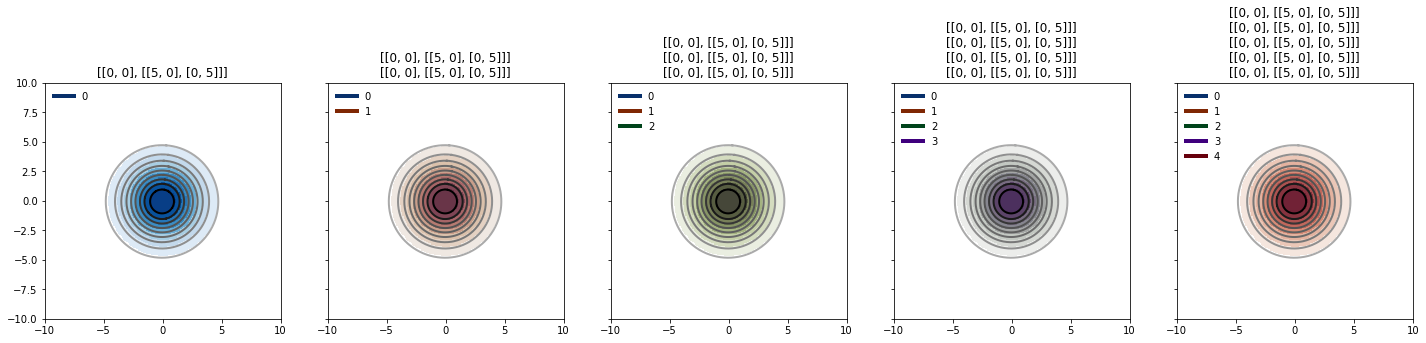

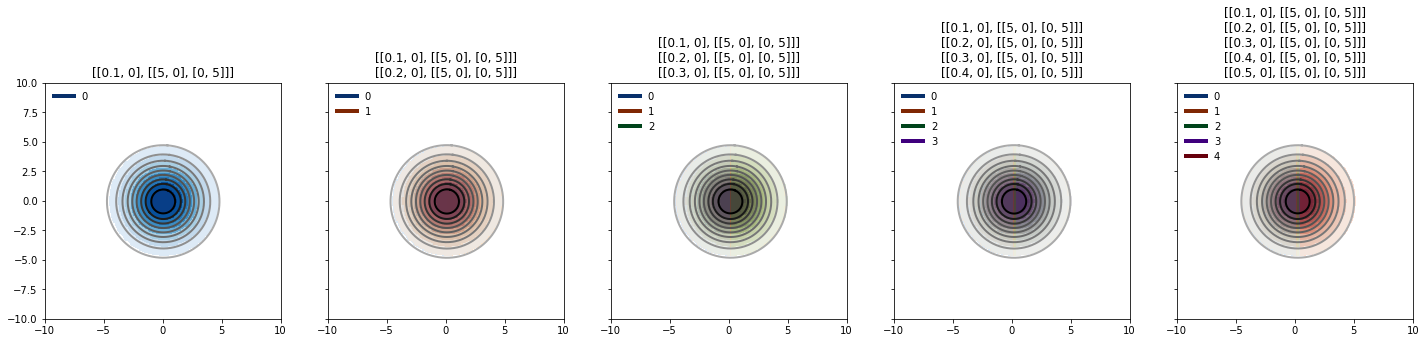

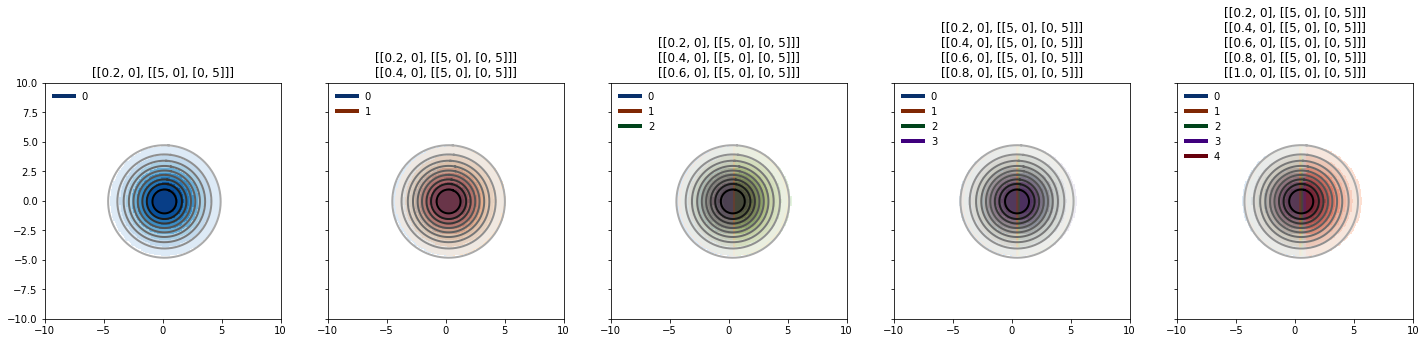

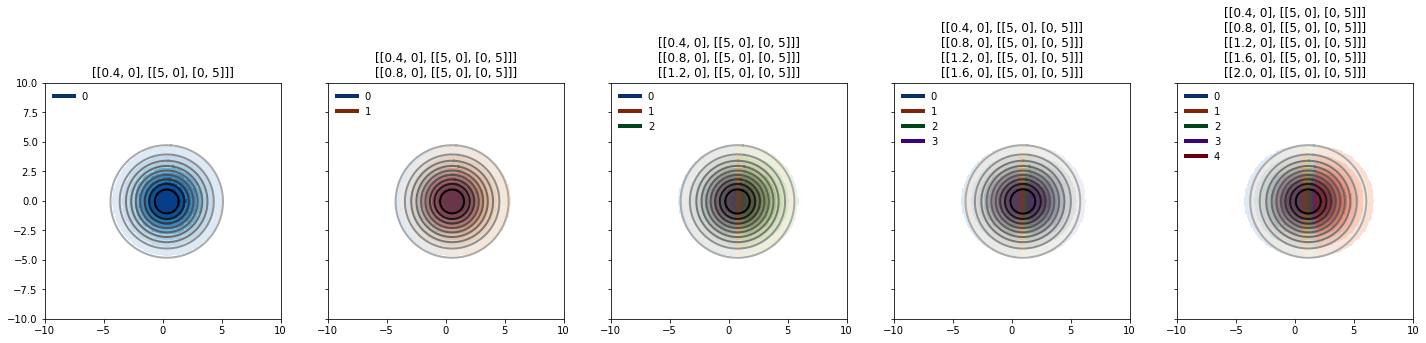

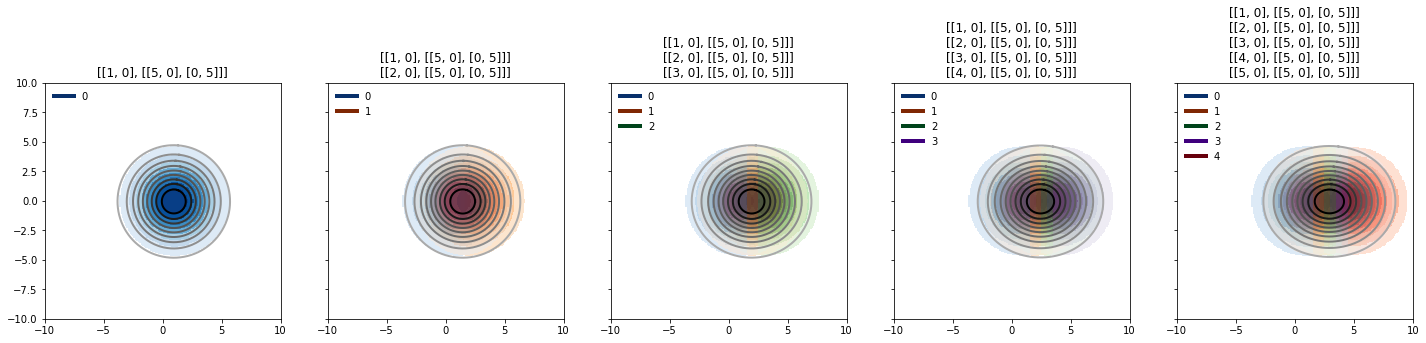

In [59]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes)

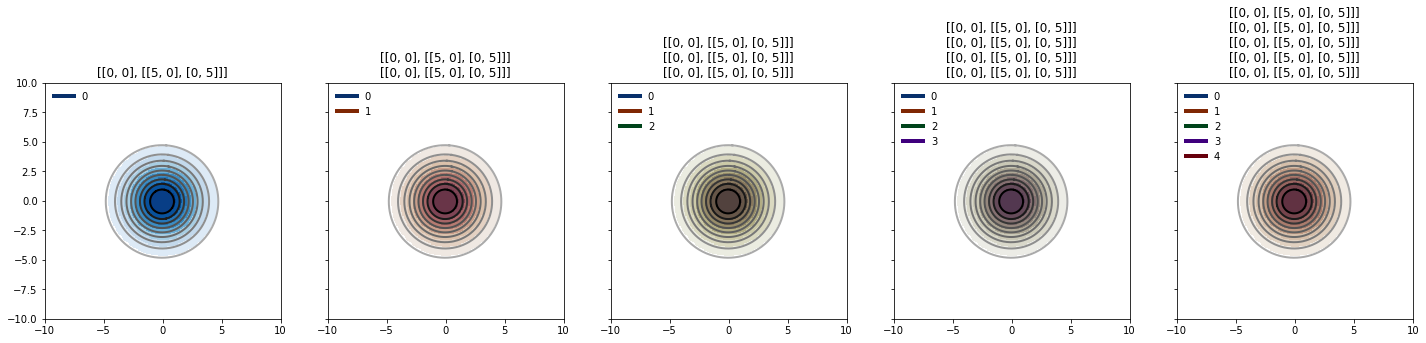

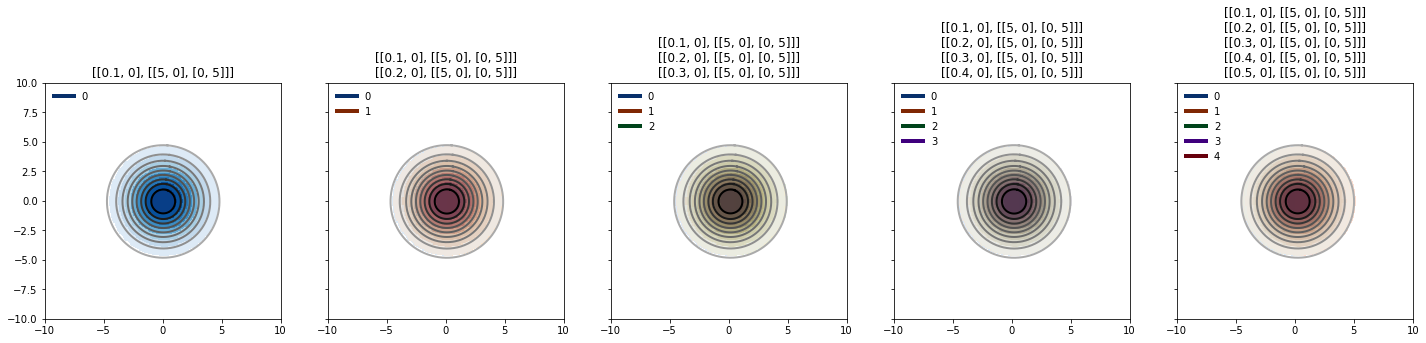

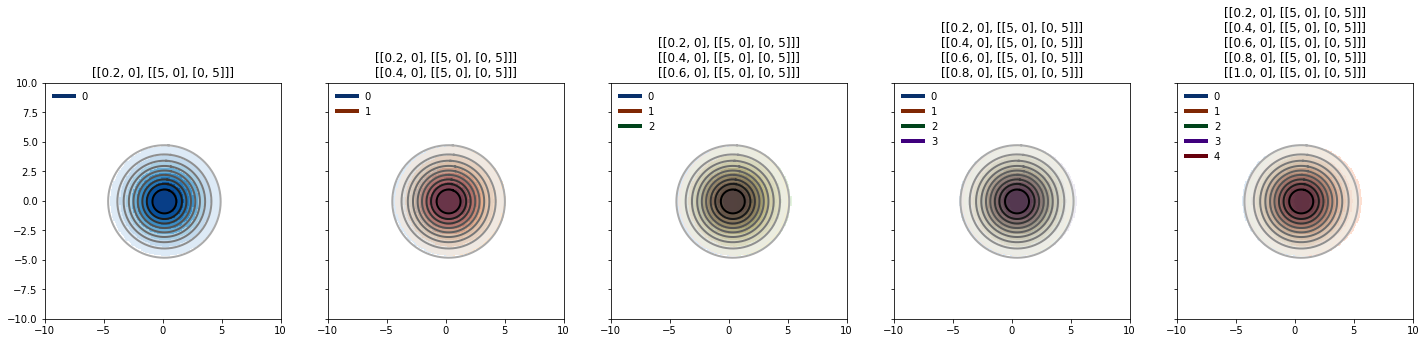

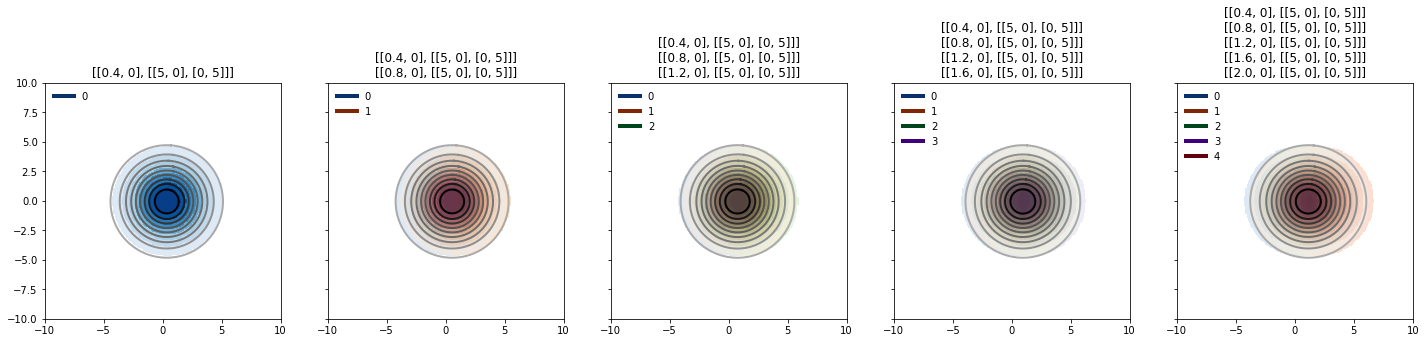

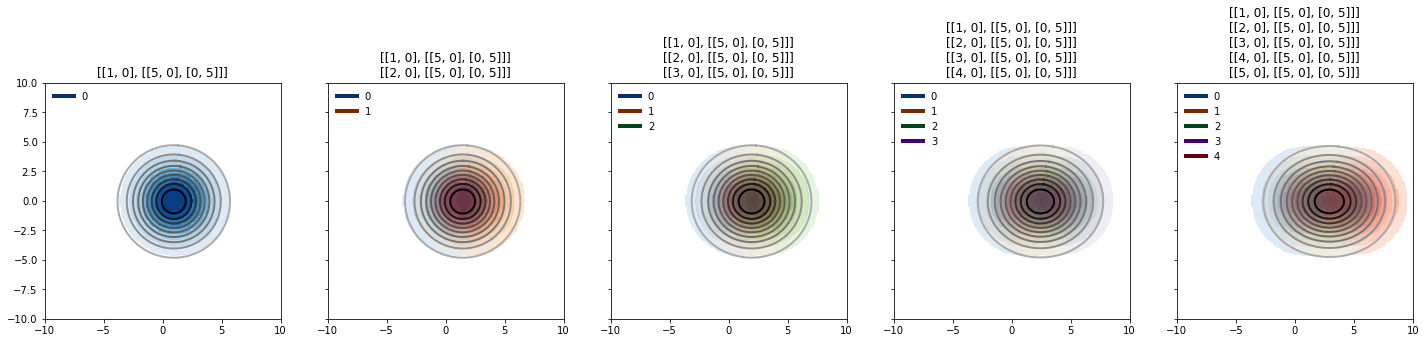

In [22]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes)

Reihe: Erklärung <br>
1: Beispielreihe <br>
2: 4 Gaussians bewegen sich voneinander weg. Jeder Gaussian in eine Richtung. Interessant sind hier die Stellen an denen sich die Gaussians überlappen. Es wirkt ein wenig wie der Farbkreis <br>
3: Selbes Scenario wie in der zweiten Reihe, nur diesmal mit einem weiteren Gaussian in der Mitte. Dieser wird nicht verändert Wann taucht er auf? Wie beeinflusst er die anderen Gaussians? <br>
4/5/6: Selbes Scenario wie in der zweiten Reihe, nur diesmal wird der Gaussian in der Mitte in jeder Zeile größer. Dieser wird in seiner Varianz verändert wobei die X- und Y-Varianz gleich verändert werden. Wann taucht er auf? Wie beeinflusst er die anderen Gaussians? <br>

In [23]:
from src import picture_worker

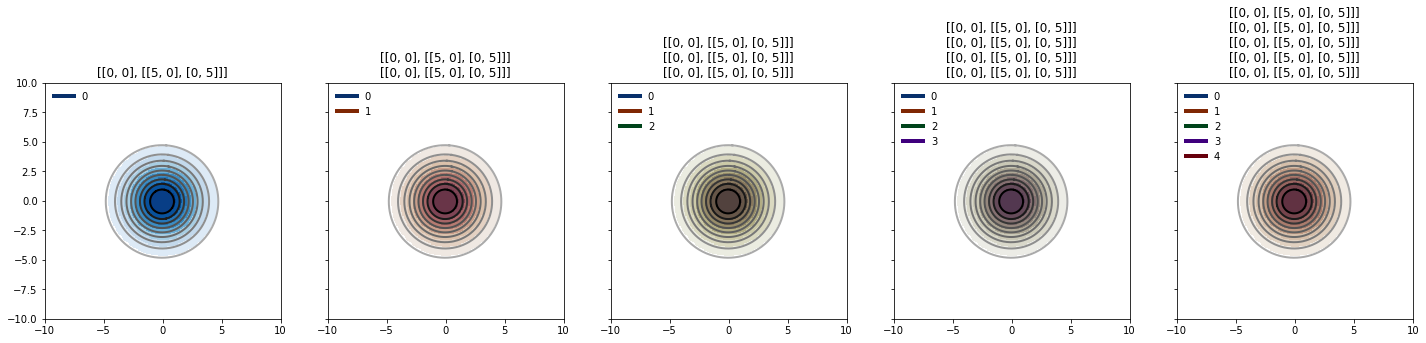

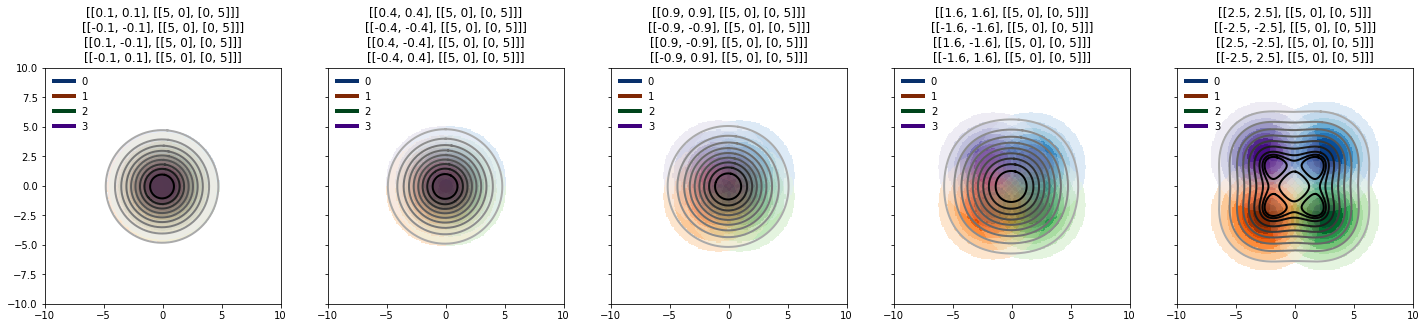

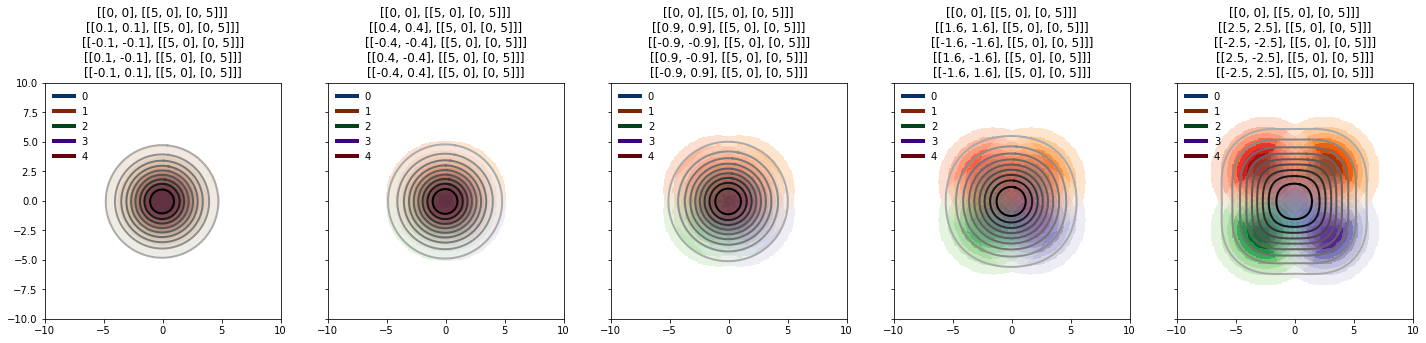

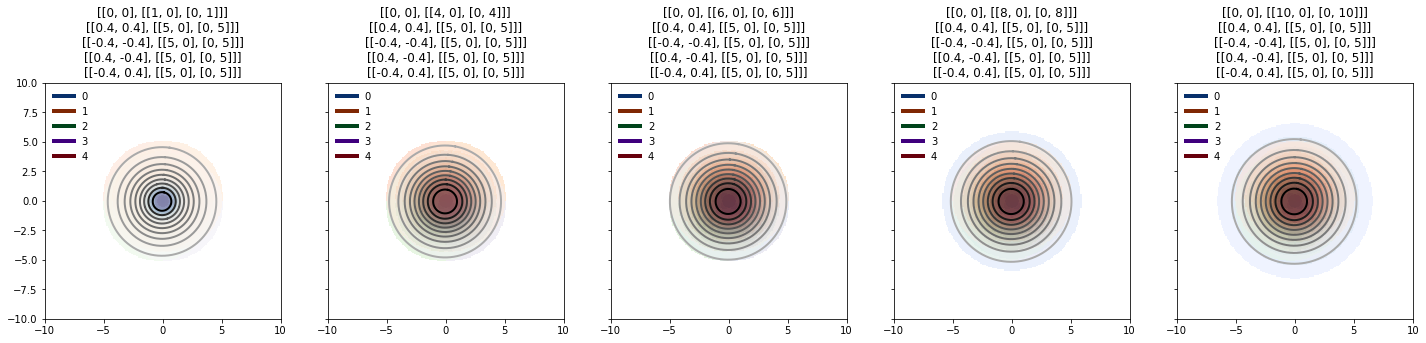

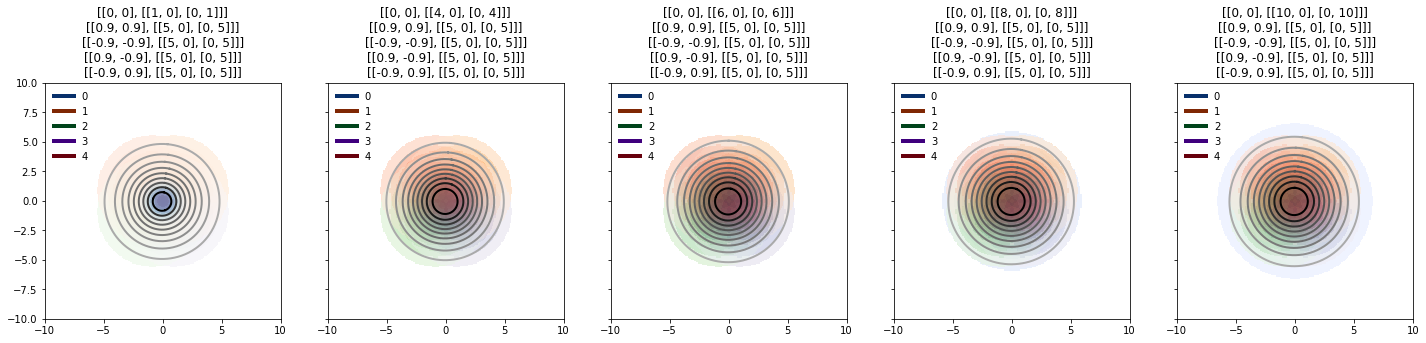

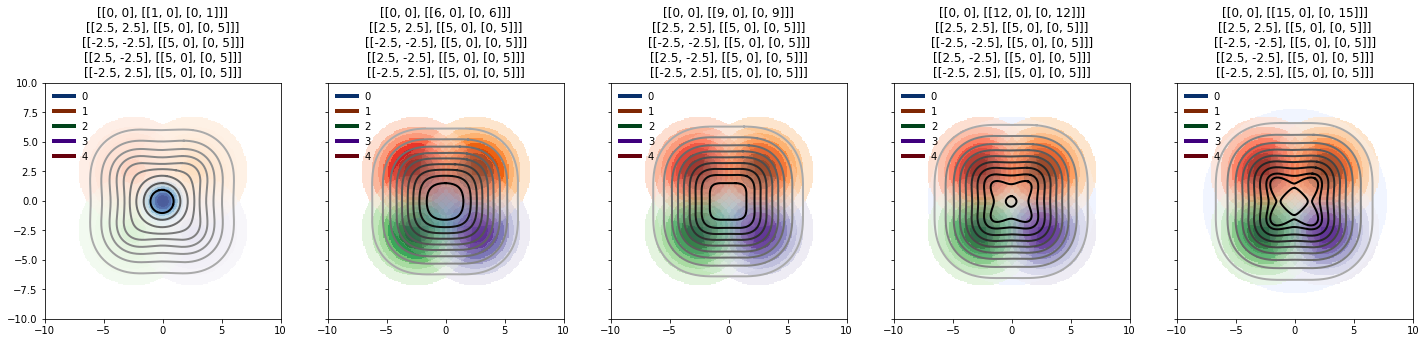

In [24]:
picture_worker.plot_images(images_overlapping_side, gaussians_side, z_sums_side, color_codes)

ValueError: Minimum of levels is suppost to be in the intervall [0 <= x < Maximum]. Found 1.0

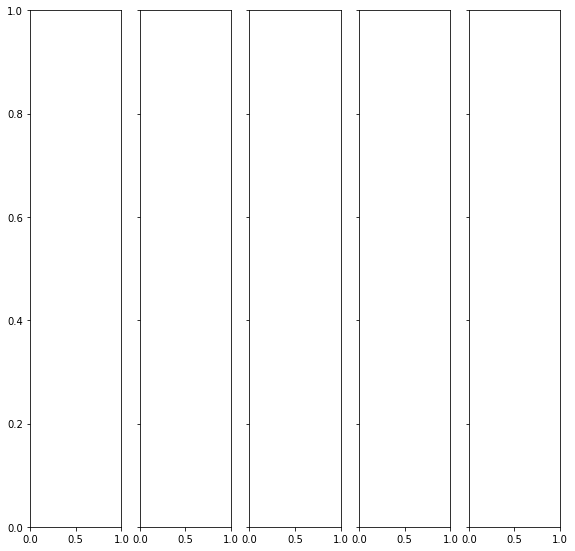

In [25]:
picture_worker.plot_images(images_overlapping_side, gaussians_side, z_sums_side, color_codes, contour_lines_weighted=False)